# Dataset Preprocessing

To facilitate faster experimentation and reduce computational overhead, all images and corresponding masks were downsampled to a resolution of 128 × 128 pixels. Additionally, pixel intensities were normalised to the range [0 − 1] to ensure consistency across the dataset.

Loading required libraries

In [2]:
import os

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.metrics import (accuracy_score, f1_score, precision_score,
                             recall_score)

In [2]:
# Define paths for training, testing, and validation datasets
train_path = "/home/mn628/FEDERATED_LEARNING/new_database/seg/train"
test_path = "/home/mn628/FEDERATED_LEARNING/new_database/seg/test"
val_path = "/home/mn628/FEDERATED_LEARNING/new_database/seg/val"

In [3]:
# path to save the training, testing, and validation data
train_save = "/home/mn628/FEDERATED_LEARNING/data/train_images.npy"
train_mask_save = "/home/mn628/FEDERATED_LEARNING/data/train_masks.npy"
val_save = "/home/mn628/FEDERATED_LEARNING/data/val_images.npy"
val_mask_save = "/home/mn628/FEDERATED_LEARNING/data/val_masks.npy"
test_save = "/home/mn628/FEDERATED_LEARNING/data/test_images.npy"
test_mask_save = "/home/mn628/FEDERATED_LEARNING/data/test_masks.npy"

#### Load the dataset

In [ ]:
def load_data(path):
    """
    Load images and segmentations from the provided folder path.
    """
    images = []
    mebe = []
    for folder in os.listdir(path + "/images"):
        for folder1 in os.listdir(path + "/images/" + folder):
            for file in os.listdir(path + "/images/" + folder + "/" + folder1):
                if 'Ma' in folder or 'Me' in folder:
                    mebe.append(1)
                else:
                    mebe.append(0)
                img = plt.imread(
                    path + "/images/" + folder + "/" + folder1 + "/" + file
                )
                images.append(img)
    segm = []
    for folder in os.listdir(path + "/labels"):
        for folder1 in os.listdir(path + "/labels/" + folder):
            for file in os.listdir(path + "/labels/" + folder + "/" + folder1):
                img = plt.imread(
                    path + "/labels/" + folder + "/" + folder1 + "/" + file
                )
                segm.append(img)
    return images, segm, mebe

In [ ]:
train_images, train_segm, mebe_train = load_data(train_path)
val_images, val_segm, mebe_val = load_data(val_path)
test_images, test_segm, mebe_test = load_data(test_path)

In [40]:
print("Number of malignant tumours in first half of training set:", np.sum(mebe_train[:len(mebe_train)//2]))
print("Number of benign tumours in first half of training set:", np.sum(1 - np.array(mebe_train[:len(mebe_train)//2])))
print("Number of malignant tumours in second half of training set:", np.sum(mebe_train[len(mebe_train)//2:]))
print("Number of benign tumours in second half of training set:", np.sum(1 - np.array(mebe_train[len(mebe_train)//2:])))

Number of malignant tumours in first half of training set: 7599
Number of benign tumours in first half of training set: 2618
Number of malignant tumours in second half of training set: 7276
Number of benign tumours in second half of training set: 2941


In [41]:
print("Number of malignant tumours in first half of validation set:", np.sum(mebe_val[:len(mebe_val)//2]))
print("Number of benign tumours in first half of validation set:", np.sum(1 - np.array(mebe_val[:len(mebe_val)//2])))
print("Number of malignant tumours in second half of validation set:", np.sum(mebe_val[len(mebe_val)//2:]))
print("Number of benign tumours in second half of validation set:", np.sum(1 - np.array(mebe_val[len(mebe_val)//2:])))

Number of malignant tumours in first half of validation set: 688
Number of benign tumours in first half of validation set: 306
Number of malignant tumours in second half of validation set: 893
Number of benign tumours in second half of validation set: 102


#### Find and exclude the problematic image

In [ ]:
lengths = [d.shape for d in train_images]

suma, position, final_pos = 0, 0, 0
for i in lengths:
    if i == (369, 369, 3):
        suma += 1
        final_pos = position
    position += 1

suma, final_pos

In [1]:
tr_img = train_images[:final_pos] + train_images[final_pos + 1 :]
tr_segm = train_segm[:final_pos] + train_segm[final_pos + 1 :]

len(train_images), len(train_segm), len(tr_img), len(tr_segm)

(20434, 20434, 20433, 20433)

#### Data shape and samples

In [9]:
tr_img, tr_segm = np.array(tr_img), np.array(tr_segm)
val_img, val_segm = np.array(val_images), np.array(val_segm)
ts_img, ts_segm = np.array(test_images), np.array(test_segm)

tr_segm.shape, tr_img.shape, val_img.shape, val_segm.shape, ts_img.shape, ts_segm.shape

((20433, 369, 369),
 (20433, 369, 369),
 (1989, 369, 369),
 (1989, 369, 369),
 (7089, 369, 369),
 (7089, 369, 369))

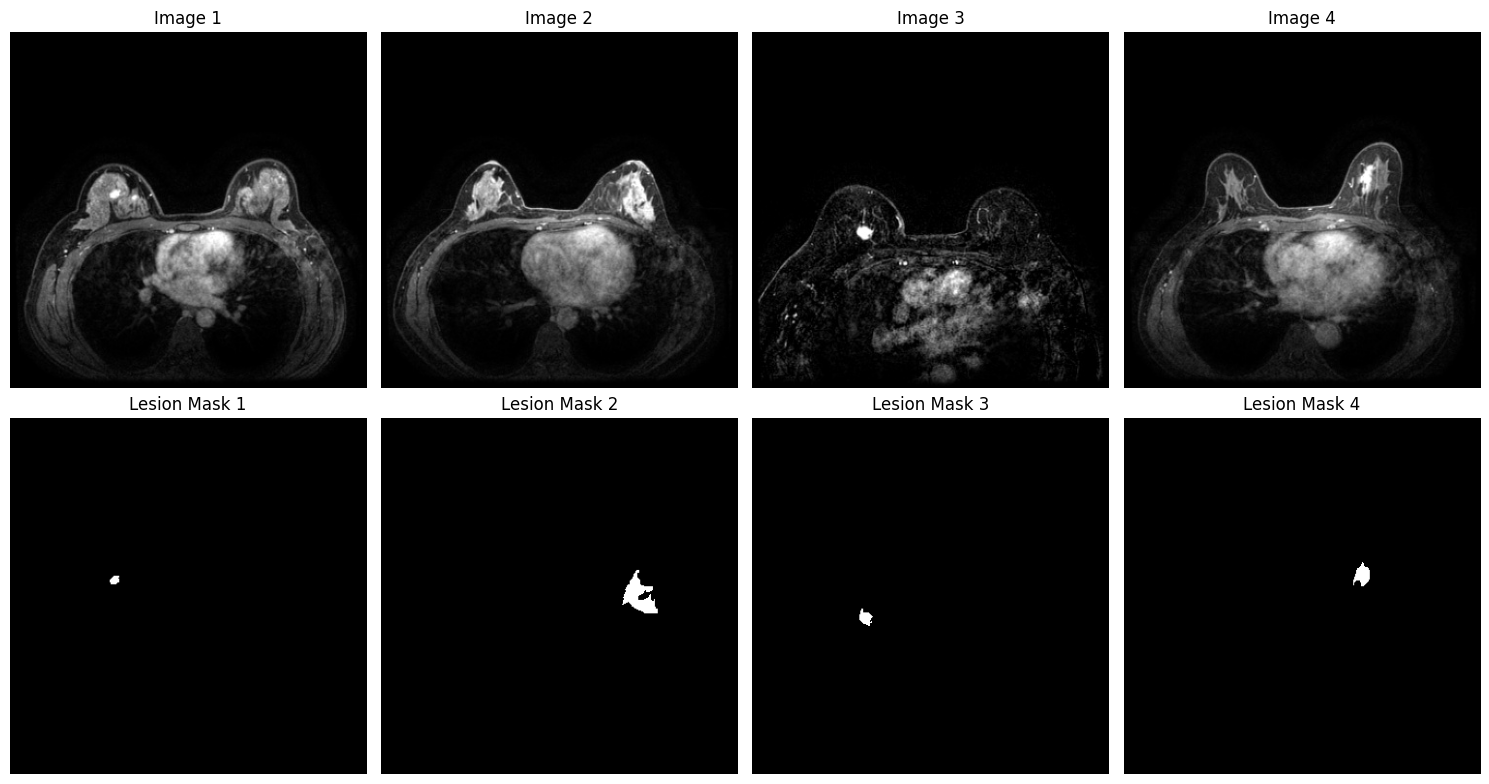

In [ ]:
imgs = [0, 1820, 1000, 800]
plt.figure(figsize=(15, 8))
plt.subplot(2, 4, 1), plt.imshow(train_images[imgs[0]], cmap="gray"), plt.title(
    "Image 1"
), plt.axis("off")
plt.subplot(2, 4, 2), plt.imshow(train_images[imgs[1]], cmap="gray"), plt.title(
    "Image 2"
), plt.axis("off")
plt.subplot(2, 4, 3), plt.imshow(train_images[imgs[2]], cmap="gray"), plt.title(
    "Image 3"
), plt.axis("off")
plt.subplot(2, 4, 4), plt.imshow(train_images[imgs[3]], cmap="gray"), plt.title(
    "Image 4"
), plt.axis("off")
plt.subplot(2, 4, 5), plt.imshow(train_segm[imgs[0]], cmap="gray"), plt.title(
    "Lesion Mask 1"
), plt.axis("off")
plt.subplot(2, 4, 6), plt.imshow(train_segm[imgs[1]], cmap="gray"), plt.title(
    "Lesion Mask 2"
), plt.axis("off")
plt.subplot(2, 4, 7), plt.imshow(train_segm[imgs[2]], cmap="gray"), plt.title(
    "Lesion Mask 3"
), plt.axis("off")
plt.subplot(2, 4, 8), plt.imshow(train_segm[imgs[3]], cmap="gray"), plt.title(
    "Lesion Mask 4"
), plt.axis("off")
plt.tight_layout()
plt.show()

#### Normalisation and dimension adaptation

In [ ]:
tr_img, val_img, ts_img = tr_img / 255.0, val_img / 255.0, ts_img / 255.0

train_images, train_segmentation = np.expand_dims(tr_img, axis=-1), np.expand_dims(
    tr_segm, axis=-1
)
val_images, val_segmentation = np.expand_dims(val_img, axis=-1), np.expand_dims(
    val_segm, axis=-1
)
test_images, test_segmentation = np.expand_dims(ts_img, axis=-1), np.expand_dims(
    ts_segm, axis=-1
)

train_images.shape, train_segmentation.shape, val_images.shape, val_segmentation.shape, test_images.shape, test_segmentation.shape

((20433, 369, 369, 1),
 (20433, 369, 369, 1),
 (1989, 369, 369, 1),
 (1989, 369, 369, 1),
 (7089, 369, 369, 1),
 (7089, 369, 369, 1))

#### Resize input images (downsampling)

In [ ]:
im_size = 128

train_images, train_segmentation = tf.image.resize(
    train_images, [im_size, im_size]
), tf.image.resize(train_segmentation, [im_size, im_size])
val_images, val_segmentation = tf.image.resize(
    val_images, [im_size, im_size]
), tf.image.resize(val_segmentation, [im_size, im_size])
test_images, test_segmentation = tf.image.resize(
    test_images, [im_size, im_size]
), tf.image.resize(test_segmentation, [im_size, im_size])

train_images.shape, train_segmentation.shape, val_images.shape, val_segmentation.shape, test_images.shape, test_segmentation.shape

2025-02-18 02:54:09.566582: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


(TensorShape([20433, 128, 128, 1]),
 TensorShape([20433, 128, 128, 1]),
 TensorShape([1989, 128, 128, 1]),
 TensorShape([1989, 128, 128, 1]),
 TensorShape([7089, 128, 128, 1]),
 TensorShape([7089, 128, 128, 1]))

In [ ]:
np.save(train_save, train_images)
np.save(train_mask_save, train_segmentation)
np.save(val_save, val_images)
np.save(val_mask_save, val_segmentation)
np.save(test_save, test_images)
np.save(test_mask_save, test_segmentation)